## Comparison between Classical approach vs Grovers Search

In [2]:
from pymongo import MongoClient
import random
import string
import psutil
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
#brew services start mongodb-community@6.0


In [3]:
# Connect to MongoDB (default host and port: localhost:27017)
client = MongoClient('mongodb://localhost:27017/')
# Create or access the 'user_info_db' database
db = client['user_info_db']

In [4]:
collection_50 = db['user_info_50']
collection_500 = db['user_info_500']
collection_5000 = db['user_info_5000']

classical_search_50 = db['classical_search_50']
classical_search_500 = db['classical_search_500']
classical_search_5000 = db['classical_search_5000']

grover_search_50 = db['grover_search_50']  
grover_search_500 = db['grover_search_500']
grover_search_5000 = db['grover_search_5000']

Average time for Classical Search: 0.011982 seconds
Average time for Grover's Algorithm: 0.004913 seconds


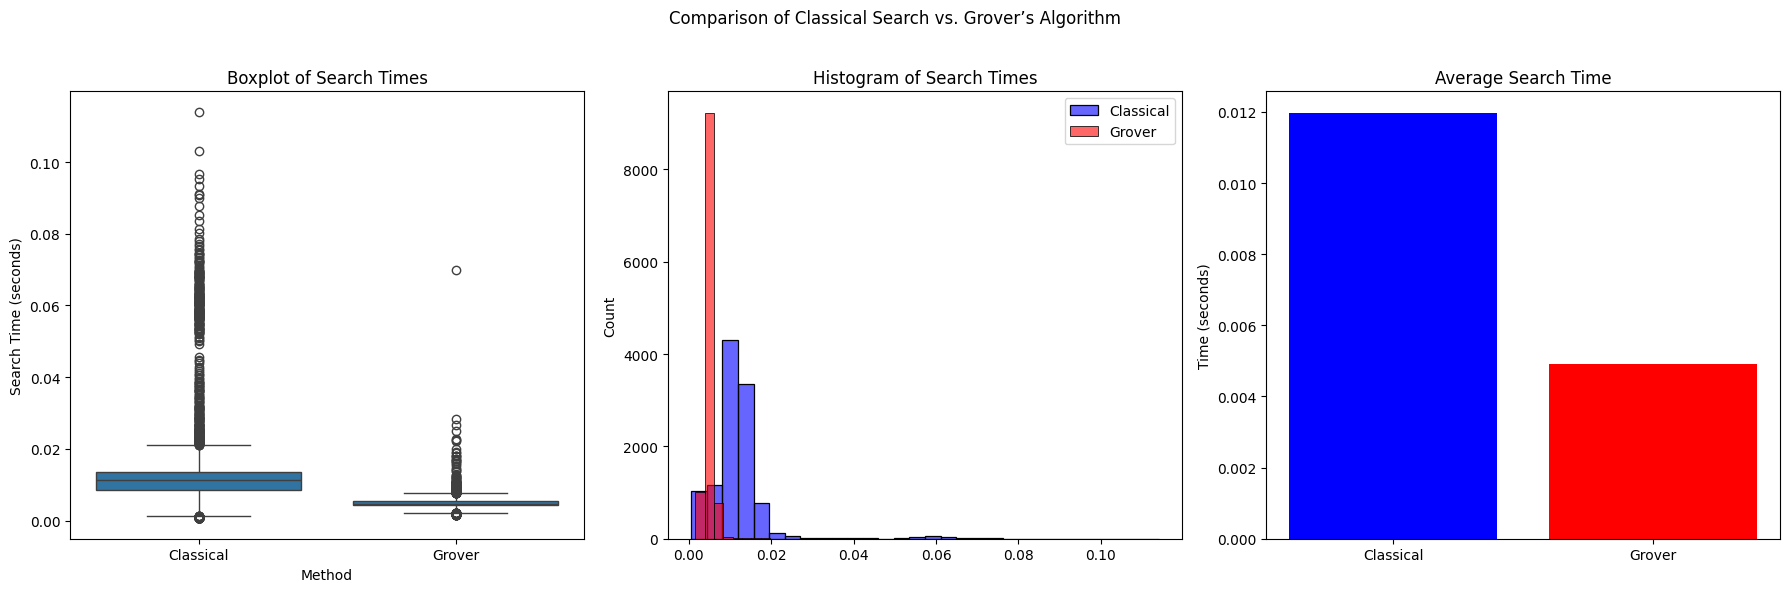

In [11]:
# Create a DataFrame for both classical and Grover search methods
df_comparison = pd.DataFrame({
    'Search Time (seconds)': classical_times + grover_times,
    'Method': ['Classical'] * len(classical_times) + ['Grover'] * len(grover_times)
})

# Calculate the average time for each method
average_classical_time = sum(classical_times) / len(classical_times)
average_grover_time = sum(grover_times) / len(grover_times)

# Print the average times for comparison
print(f"Average time for Classical Search: {average_classical_time:.6f} seconds")
print(f"Average time for Grover's Algorithm: {average_grover_time:.6f} seconds")

# Set up the figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparison of Classical Search vs. Grover’s Algorithm')

# Boxplot for search times
sns.boxplot(x='Method', y='Search Time (seconds)', data=df_comparison, ax=axes[0])
axes[0].set_title('Boxplot of Search Times')

# Histogram of search times
sns.histplot(classical_times, bins=30, color='blue', label='Classical', alpha=0.6, ax=axes[1])
sns.histplot(grover_times, bins=30, color='red', label='Grover', alpha=0.6, ax=axes[1])
axes[1].set_title('Histogram of Search Times')
axes[1].legend()

# Bar chart comparing average times
axes[2].bar(['Classical', 'Grover'], [average_classical_time, average_grover_time], color=['blue', 'red'])
axes[2].set_title('Average Search Time')
axes[2].set_ylabel('Time (seconds)')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


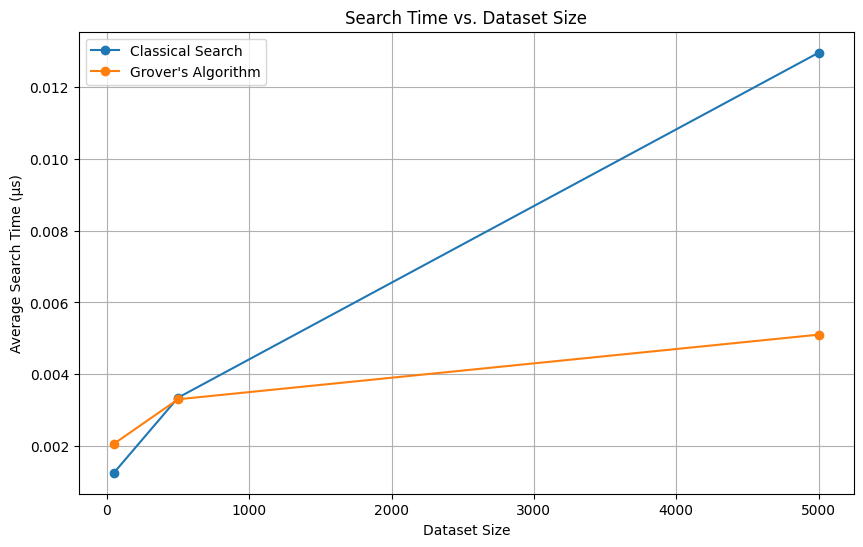

In [12]:
sizes = [50, 500, 5000]
classical_avg_times = [
    np.mean(classical_times_50),
    np.mean(classical_times_500),
    np.mean(classical_times_5000),
]
grover_avg_times = [
    np.mean(grover_times_50),
    np.mean(grover_times_500),
    np.mean(grover_times_5000),
]

plt.figure(figsize=(10, 6))
plt.plot(sizes, classical_avg_times, label="Classical Search", marker="o")
plt.plot(sizes, grover_avg_times, label="Grover's Algorithm", marker="o")
plt.xlabel("Dataset Size")
plt.ylabel("Average Search Time (µs)")
plt.title("Search Time vs. Dataset Size")
plt.legend()
plt.grid()
plt.show()


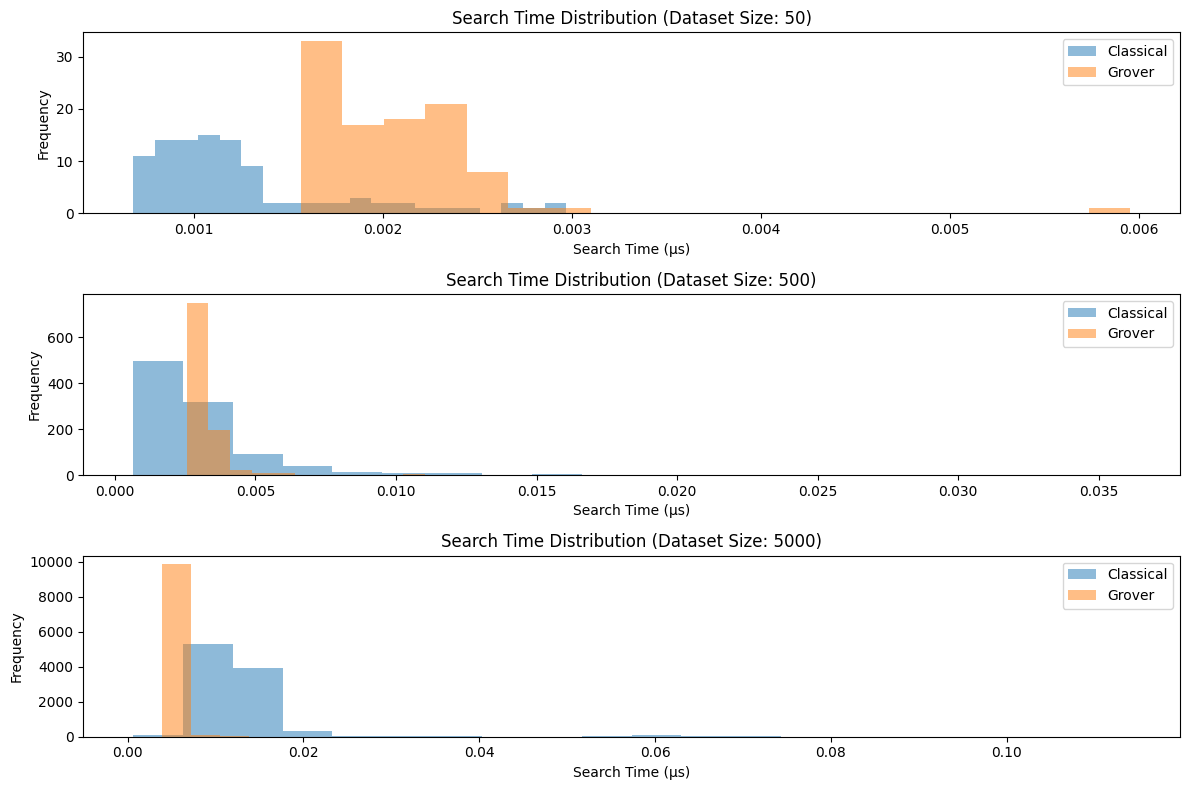

In [13]:
plt.figure(figsize=(12, 8))
for i, (classical, grover, size) in enumerate(
    zip([classical_times_50, classical_times_500, classical_times_5000],
        [grover_times_50, grover_times_500, grover_times_5000],
        sizes)):
    plt.subplot(3, 1, i + 1)
    plt.hist(classical, alpha=0.5, label="Classical", bins=20)
    plt.hist(grover, alpha=0.5, label="Grover", bins=20)
    plt.title(f"Search Time Distribution (Dataset Size: {size})")
    plt.xlabel("Search Time (µs)")
    plt.ylabel("Frequency")
    plt.legend()
plt.tight_layout()
plt.show()
